In [51]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
from pycaret.regression import *


In [3]:
grande = pd.read_parquet('fhvhv_tripdata_2023-01.parquet')

In [4]:
grande

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-01-01 00:18:06,2023-01-01 00:19:24,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,0.94,...,2.30,2.75,0.0,5.22,27.83,N,N,,N,N
1,HV0003,B03404,B03404,2023-01-01 00:48:42,2023-01-01 00:56:20,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,2.78,...,5.34,2.75,0.0,0.00,50.15,N,N,,N,N
2,HV0003,B03404,B03404,2023-01-01 00:15:35,2023-01-01 00:20:14,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,8.81,...,2.16,0.00,0.0,0.00,20.22,N,N,,N,N
3,HV0003,B03404,B03404,2023-01-01 00:35:24,2023-01-01 00:39:30,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,0.67,...,1.22,0.00,0.0,0.00,7.90,N,N,,N,N
4,HV0003,B03404,B03404,2023-01-01 00:43:15,2023-01-01 00:51:10,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,4.38,...,1.82,0.00,0.0,0.00,16.48,N,N,,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479026,HV0003,B03404,B03404,2023-01-31 23:33:42,2023-01-31 23:37:04,2023-01-31 23:39:34,2023-01-31 23:45:11,161,100,0.67,...,1.31,2.75,0.0,0.00,10.62,N,N,,N,N
18479027,HV0003,B03404,B03404,2023-01-31 23:31:20,2023-01-31 23:35:17,2023-01-31 23:35:25,2023-01-31 23:47:28,129,56,2.04,...,0.88,0.00,0.0,0.00,9.82,N,N,,N,N
18479028,HV0003,B03404,B03404,2023-01-31 23:15:39,2023-01-31 23:16:35,2023-01-31 23:18:09,2023-01-31 23:34:46,234,236,4.14,...,3.41,2.75,0.0,0.00,24.22,N,N,,N,N
18479029,HV0003,B03404,B03404,2023-01-31 23:40:03,2023-01-31 23:41:31,2023-01-31 23:44:07,2023-01-31 23:52:16,237,163,1.10,...,1.37,2.75,0.0,0.00,12.62,N,N,,N,N


In [5]:
grande['pickup_datetime'].value_counts()

pickup_datetime
2023-01-12 18:26:31    33
2023-01-18 08:02:00    33
2023-01-21 22:41:07    32
2023-01-01 01:00:00    32
2023-01-10 07:42:01    32
                       ..
2023-01-02 07:55:34     1
2023-01-22 04:45:53     1
2023-01-02 07:05:51     1
2023-01-22 04:57:57     1
2023-01-31 23:51:06     1
Name: count, Length: 2604111, dtype: int64

In [6]:
grande['pickup_datetime']= grande['pickup_datetime'].drop_duplicates()

In [7]:
grande.dropna()
grande.rename(columns={'pickup_datetime':'ds'},inplace=True)
grande.rename(columns={'driver_pay':'y'},inplace=True)


In [8]:
grande

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,ds,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,y,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-01-01 00:18:06,2023-01-01 00:19:24,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,0.94,...,2.30,2.75,0.0,5.22,27.83,N,N,,N,N
1,HV0003,B03404,B03404,2023-01-01 00:48:42,2023-01-01 00:56:20,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,2.78,...,5.34,2.75,0.0,0.00,50.15,N,N,,N,N
2,HV0003,B03404,B03404,2023-01-01 00:15:35,2023-01-01 00:20:14,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,8.81,...,2.16,0.00,0.0,0.00,20.22,N,N,,N,N
3,HV0003,B03404,B03404,2023-01-01 00:35:24,2023-01-01 00:39:30,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,0.67,...,1.22,0.00,0.0,0.00,7.90,N,N,,N,N
4,HV0003,B03404,B03404,2023-01-01 00:43:15,2023-01-01 00:51:10,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,4.38,...,1.82,0.00,0.0,0.00,16.48,N,N,,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479026,HV0003,B03404,B03404,2023-01-31 23:33:42,2023-01-31 23:37:04,NaT,2023-01-31 23:45:11,161,100,0.67,...,1.31,2.75,0.0,0.00,10.62,N,N,,N,N
18479027,HV0003,B03404,B03404,2023-01-31 23:31:20,2023-01-31 23:35:17,NaT,2023-01-31 23:47:28,129,56,2.04,...,0.88,0.00,0.0,0.00,9.82,N,N,,N,N
18479028,HV0003,B03404,B03404,2023-01-31 23:15:39,2023-01-31 23:16:35,NaT,2023-01-31 23:34:46,234,236,4.14,...,3.41,2.75,0.0,0.00,24.22,N,N,,N,N
18479029,HV0003,B03404,B03404,2023-01-31 23:40:03,2023-01-31 23:41:31,NaT,2023-01-31 23:52:16,237,163,1.10,...,1.37,2.75,0.0,0.00,12.62,N,N,,N,N


In [9]:
import numpy as np 
filas = 50000
pequeño = grande.sample(n=filas, random_state=42)

In [10]:
s = setup(pequeño,target='y')

,Description,Value
0,Session id,7287
1,Target,y
2,Target type,Regression
3,Original data shape,"(50000, 24)"
4,Transformed data shape,"(50000, 36)"
5,Transformed train set shape,"(35000, 36)"
6,Transformed test set shape,"(15000, 36)"
7,Ordinal features,6
8,Numeric features,11
9,Date features,4


In [11]:
# se comparan modelos para ver cual es mejor.
best = compare_models()
mejores = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.0281,5.9432,2.4158,0.9700,0.1613,0.0640,2.1570
et,Extra Trees Regressor,1.0510,6.2737,2.4641,0.9683,0.1677,0.0663,1.4540
lightgbm,Light Gradient Boosting Machine,1.1661,6.9308,2.5996,0.9651,0.1837,0.0724,0.5100
rf,Random Forest Regressor,1.1054,7.2145,2.6409,0.9636,0.1834,0.0679,3.3950
gbr,Gradient Boosting Regressor,1.4513,7.2957,2.6899,0.9629,0.2129,0.0906,1.0060
lr,Linear Regression,1.7677,10.1155,3.1626,0.9486,0.3045,0.1147,0.6820
ridge,Ridge Regression,1.7676,10.1149,3.1626,0.9486,0.3045,0.1147,0.4480
br,Bayesian Ridge,1.7676,10.1148,3.1625,0.9486,0.3045,0.1147,0.0760
dt,Decision Tree Regressor,1.5335,13.2174,3.6085,0.9331,0.2387,0.0944,0.1340
en,Elastic Net,1.9053,14.3864,3.7727,0.9266,0.3727,0.1105,0.0810


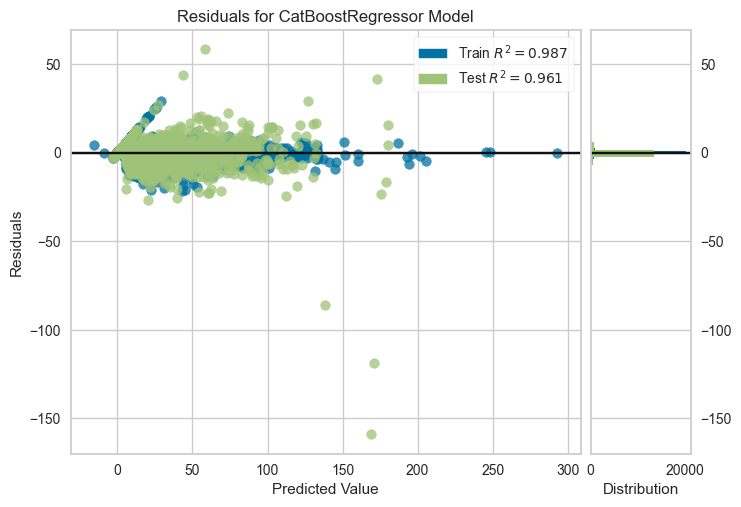

In [12]:
# Gráfico de residuales
plot_model(best,plot='residuals')

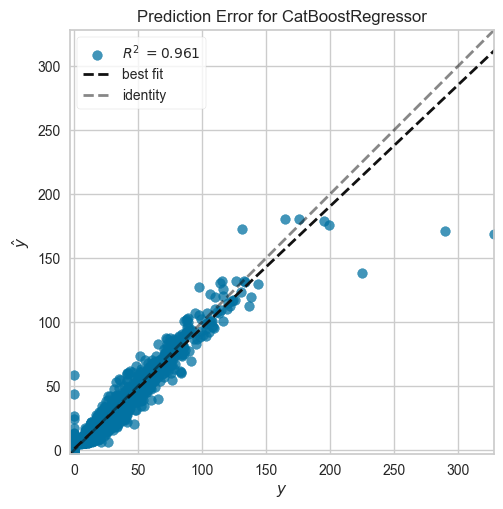

In [13]:
# Gráfico de errores
plot_model(best,plot='error')

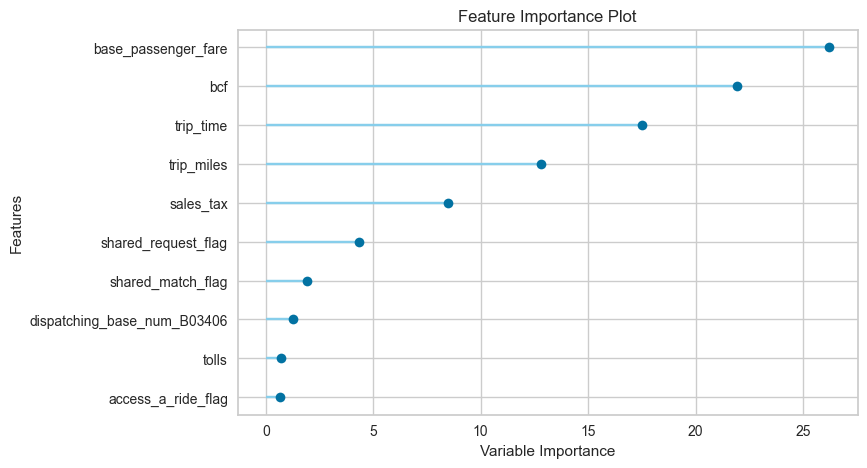

In [14]:
# Gráfico de variables más importantes
plot_model(best,plot='feature')

In [15]:
# predccion en el conjunto de test
pred_test = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.0428,8.2458,2.8716,0.9609,0.1566,0.0749


In [16]:
# mostrar predicciones en df
pred_test.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,ds,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,congestion_surcharge,airport_fee,tips,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,y,prediction_label
13953788,HV0003,B03404,B03404,2023-01-24 20:47:00,2023-01-24 20:48:42,NaT,2023-01-24 21:16:12,246,255,7.050,...,2.75,0.0,0.00,N,N,,N,N,22.330000,23.704638
10020726,HV0003,B03404,B03404,2023-01-18 18:10:51,2023-01-18 18:13:47,NaT,2023-01-18 19:29:32,161,265,24.730,...,2.75,0.0,9.16,N,N,,N,N,70.599998,76.149839
4200414,HV0003,B03404,B03404,2023-01-08 18:49:42,2023-01-08 18:51:53,NaT,2023-01-08 19:28:13,49,236,9.900,...,2.75,0.0,0.00,N,N,,N,N,30.160000,30.536632
8177827,HV0005,B03406,NaN,2023-01-15 12:03:33,NaT,NaT,2023-01-15 12:36:08,145,132,15.162,...,0.00,2.5,0.00,N,N,N,N,N,33.950001,37.180155
13793456,HV0003,B03404,B03404,2023-01-24 15:30:13,2023-01-24 15:32:50,NaT,2023-01-24 15:42:46,69,167,0.740,...,0.00,0.0,0.00,N,N,,N,Y,8.190000,8.012841


In [17]:
from neuralprophet import NeuralProphet

In [27]:
pequeño['ds'].dropna(inplace=True)
pequeño.dropna(subset=['ds'], inplace=True)


In [46]:
# se eliminan todas las columnas que no sean los valores necesarios, que son fechas y el valor a predecir
pequeño = pequeño[['ds','y']]

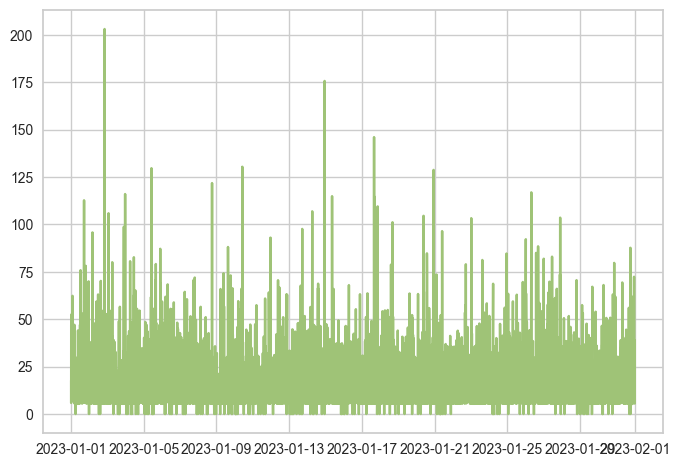

In [57]:
plt.plot(pequeño['ds'], pequeño['y'], label='actual', c='g')
plt.show()

In [47]:
# Se procede con la prediccón de co2
modelo = NeuralProphet(daily_seasonality=True)
modelo.fit(pequeño,freq='D')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency L corresponds to 0.393% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 112
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (112) is too small than the r

Finding best initial lr:   0%|          | 0/246 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,38.467293,45.669872,0.572770,0.0,0
1,19.801132,25.704769,0.234090,0.0,1
2,15.103806,20.283413,0.161975,0.0,2
3,12.532095,17.637856,0.127271,0.0,3
4,10.699102,15.756111,0.105147,0.0,4
...,...,...,...,...,...
107,8.869837,13.318252,0.083783,0.0,107
108,8.798659,13.150985,0.083045,0.0,108
109,8.801585,13.174433,0.083141,0.0,109
110,8.813899,13.218913,0.083301,0.0,110


In [55]:
prediccion = modelo.make_future_dataframe(pequeño,periods=400)
vision = modelo.predict(prediccion)
actual = modelo.predict(pequeño)
vision['ds'] , vision['yhat1']

INFO - (NP.df_utils._infer_frequency) - Major frequency L corresponds to 0.393% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.75% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.75% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 112it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency L corresponds to 0.393% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency L corresponds to 0.393% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.


Predicting: 112it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


(0     2023-02-01 23:59:58
 1     2023-02-02 23:59:58
 2     2023-02-03 23:59:58
 3     2023-02-04 23:59:58
 4     2023-02-05 23:59:58
               ...        
 395   2024-03-02 23:59:58
 396   2024-03-03 23:59:58
 397   2024-03-04 23:59:58
 398   2024-03-05 23:59:58
 399   2024-03-06 23:59:58
 Name: ds, Length: 400, dtype: datetime64[ns],
 0      14.448269
 1      14.097243
 2      13.574111
 3      13.406466
 4      13.461129
          ...    
 395     4.014445
 396     4.070567
 397     4.504217
 398     4.378930
 399     4.870183
 Name: yhat1, Length: 400, dtype: float32)

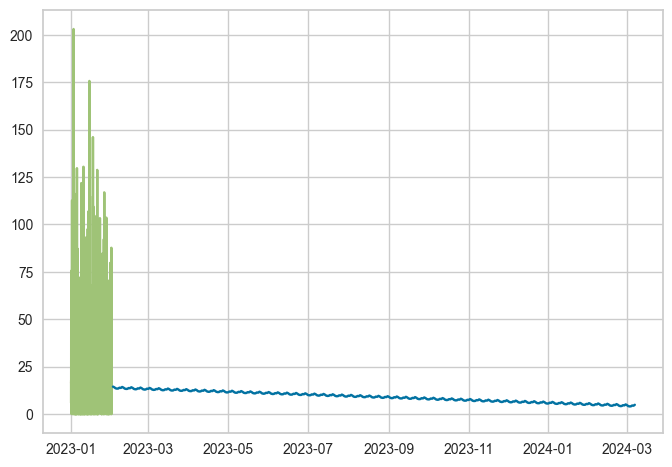

In [58]:
plt.plot(actual['ds'],actual['yhat1'], label = 'Predicción_actual',c='r')
plt.plot(pequeño['ds'], pequeño['y'], label='actual', c='g')
plt.plot(vision['ds'],vision['yhat1'], label = 'Predicción',c='b')
plt.show()